# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("auto-mpg.CSV")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307,130.0,3504,12.0,70,1,"""""chevrolet chevelle malibu"""""""
1,15.0,8,350,165.0,3693,11.5,70,1,"""""buick skylark 320"""""""
2,18.0,8,318,150.0,3436,11.0,70,1,"""""plymouth satellite"""""""
3,16.0,8,304,150.0,3433,12.0,70,1,"""""amc rebel sst"""""""
4,17.0,8,302,140.0,3449,10.5,70,1,"""""ford torino"""""""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,383,86.0,2790,15.6,82,1,"""""ford mustang gl"""""""
394,44.0,4,383,52.0,2130,24.6,82,2,"""""vw pickup"""""""
395,32.0,4,383,84.0,2295,11.6,82,1,"""""dodge rampage"""""""
396,28.0,4,383,79.0,2625,18.6,82,1,"""""ford ranger"""""""


# EDA

In [47]:
data.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name          int32
dtype: object

## WE HAVE 9 FEATURES OUT OF WHICH 8 ARE NUMERICAL 

In [4]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

## AS WE CAN SEE HORSEPOWER IS HAVING 6 MISSING VALUE:-
    1)AS IT IS NUMERICAL FEATURES
    2)FOR REMOVING NA VALUES WE SHOULD REPLACE NA VALUES BY MEAN

In [5]:
data['horsepower'].mean()

104.46938775510205

In [6]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].mean())

In [7]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

THERE ARE 7 NUMERIC FEATURES("MPG IS TARGET") AND THEY HAVE LARGE DIFFERENCE IN THERE VALUES SO IT CAN BE A PROBLEM IN OUR MODEL, SO STANDARDIZING THIS FEATURES

In [8]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307,130.0,3504,12.0,70,1,"""""chevrolet chevelle malibu"""""""
1,15.0,8,350,165.0,3693,11.5,70,1,"""""buick skylark 320"""""""
2,18.0,8,318,150.0,3436,11.0,70,1,"""""plymouth satellite"""""""
3,16.0,8,304,150.0,3433,12.0,70,1,"""""amc rebel sst"""""""
4,17.0,8,302,140.0,3449,10.5,70,1,"""""ford torino"""""""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,383,86.0,2790,15.6,82,1,"""""ford mustang gl"""""""
394,44.0,4,383,52.0,2130,24.6,82,2,"""""vw pickup"""""""
395,32.0,4,383,84.0,2295,11.6,82,1,"""""dodge rampage"""""""
396,28.0,4,383,79.0,2625,18.6,82,1,"""""ford ranger"""""""


## ENCODING
label encoding car_name

In [9]:
label_encoder = preprocessing.LabelEncoder()
  
data['car_name']= label_encoder.fit_transform(data['car_name'])
data['car_name'].unique()

array([ 50,  35, 234,  14, 162, 141,  54, 222, 242,   1, 101, 215,  59,
        30, 273, 220,   9, 150,  95, 282, 212,  16, 258,  22,   7, 133,
        68, 112, 163,  64, 274, 158, 232, 161,  11, 241, 116, 128, 250,
         8,  63, 243, 155, 187, 208, 210, 123, 266,  76, 286, 218, 271,
       104, 293,  65, 157,   2, 193,  31, 203,  75, 183,  10,  48, 142,
       231, 295, 283, 211, 253, 156,  84, 279, 103, 267,  24,  56, 143,
       110, 192,  44, 149, 221,  74,  29,   0, 236,  61, 292, 129, 219,
       207, 263,  87, 174, 188, 121,  58, 245, 124, 209,  17, 294, 113,
       260, 276, 205,  62,  93,  49, 233,  26, 109,  21, 284,  88, 107,
       122, 171, 262, 127, 235, 195,  42, 224,  28,  41, 223,  34,  60,
       154, 270, 240, 290,  13, 296, 170, 125,  40, 254, 108,  51,  66,
       304,  99, 144, 252,  12,  91, 297, 238, 186,  39,  67, 132, 111,
       164,  32, 256, 216,  94, 202, 117, 189,  53,  37, 237, 147, 244,
        57,  70, 160, 288, 251, 268, 153, 106, 261,  90,  23, 18

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='model_year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>,
        <AxesSubplot:xlabel='car_name', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='model_year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>,
        

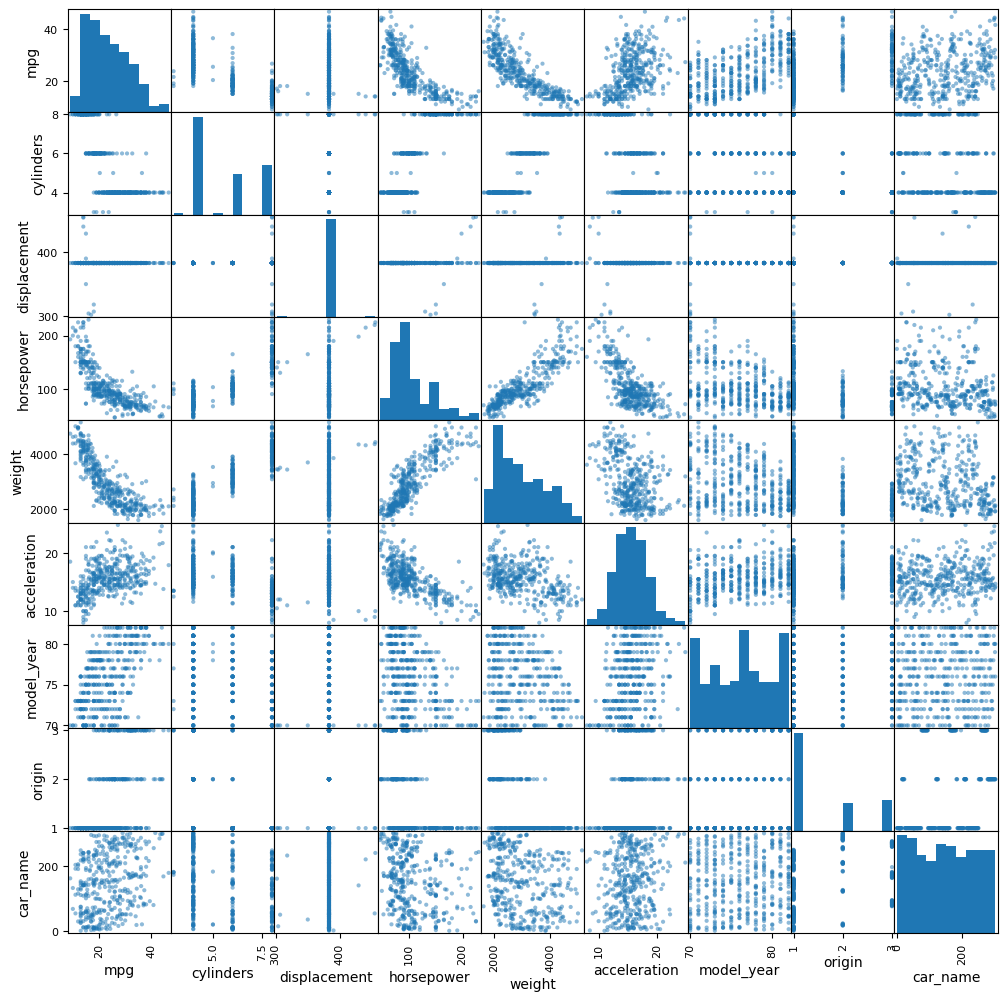

In [10]:
pd.plotting.scatter_matrix(data,figsize=(12,12))

In [11]:
data.to_csv("data_processed.csv")

# FEATURE ENGINEERING

## FEATURE SELECTION

In [12]:
y=data[['mpg']]
X=data[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

### FEATURE SCALING

In [13]:
scaler = StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.fit_transform(X_test))

In [14]:
X_train_RFE=X_train
X_test_RFE=X_test
estimator = RandomForestRegressor(criterion="squared_error")
model = RFE(estimator, n_features_to_select=5, step=1)
model = model.fit(X_train_RFE, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:310: DataConversionWarning: A column-vector y was passed when a 1

In [15]:
X_train_RFE.columns[(model.get_support())]
X_train_selected_RFE=model.transform(X_train_RFE)
X_test_selected_RFE=model.transform(X_test_RFE)

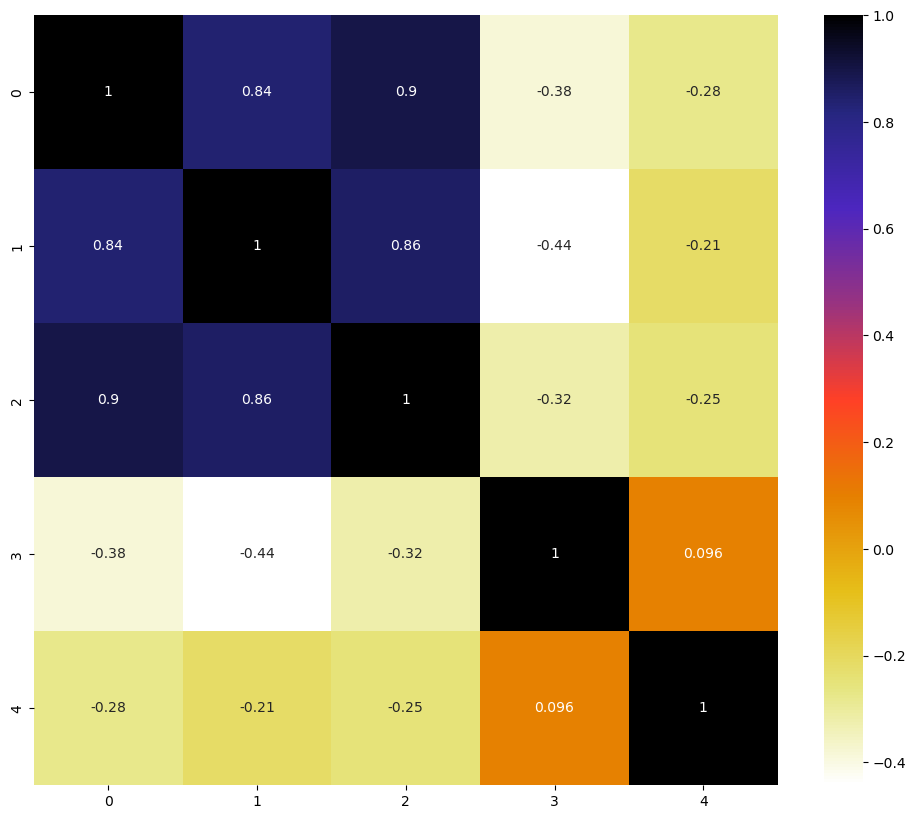

In [16]:
plt.figure(figsize=(12,10))
matrix=pd.DataFrame(X_train_selected_RFE)
cor = matrix.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# LINEAR REGRESSION MODEL

In [17]:
regressor=LinearRegression()
regressor.fit(X_train_selected_RFE,y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(X_test_selected_RFE)

In [19]:
mae_LR=mean_absolute_error(y_test,y_pred)
mse_LR=mean_squared_error(y_test,y_pred)
rmse_LR=(mean_squared_error(y_test,y_pred))**(1/2)
r2_score_LR=r2_score(y_test,y_pred)

# DECISION TREE REGRESSOR

## HYPER PARAMETER TUINING

In [20]:
clf=DecisionTreeRegressor()
parameters = {'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
           'splitter':["best", "random"],
           }
cv=GridSearchCV(clf,param_grid=parameters,cv=5,scoring='accuracy')
cv.fit(X_train_selected_RFE,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [21]:
cv.best_params_

{'criterion': 'squared_error', 'splitter': 'best'}

## CREATING MODEL

In [22]:
clf=DecisionTreeRegressor(criterion= 'squared_error',splitter='best')

In [23]:
clf.fit(X_train_selected_RFE,y_train)

DecisionTreeRegressor()

In [24]:
y_pred_DT=clf.predict(X_test_selected_RFE)

In [25]:
mae_DT=mean_absolute_error(y_test,y_pred_DT)
mse_DT=mean_squared_error(y_test,y_pred_DT)
rmse_DT=(mean_squared_error(y_test,y_pred_DT))**(1/2)
r2_score_DT=r2_score(y_test,y_pred_DT)

[Text(0.5684968099603568, 0.9736842105263158, 'X[0] <= 0.047\nsquared_error = 61.062\nsamples = 298\nvalue = 23.631'), Text(0.2724619053518335, 0.9210526315789473, 'X[3] <= 0.652\nsquared_error = 30.092\nsamples = 162\nvalue = 29.148'), Text(0.128251982160555, 0.868421052631579, 'X[2] <= -0.985\nsquared_error = 14.954\nsamples = 90\nvalue = 26.27'), Text(0.05252725470763132, 0.8157894736842105, 'X[4] <= 0.5\nsquared_error = 6.469\nsamples = 28\nvalue = 30.207'), Text(0.02973240832507433, 0.7631578947368421, 'X[1] <= -0.29\nsquared_error = 5.889\nsamples = 13\nvalue = 31.6'), Text(0.02576808721506442, 0.7105263157894737, 'X[1] <= -0.935\nsquared_error = 2.447\nsamples = 12\nvalue = 32.15'), Text(0.015857284440039643, 0.6578947368421053, 'X[4] <= 0.205\nsquared_error = 1.742\nsamples = 8\nvalue = 31.475'), Text(0.007928642220019821, 0.6052631578947368, 'X[2] <= -1.236\nsquared_error = 0.74\nsamples = 5\nvalue = 30.6'), Text(0.003964321110009911, 0.5526315789473685, 'squared_error = 0.0\n

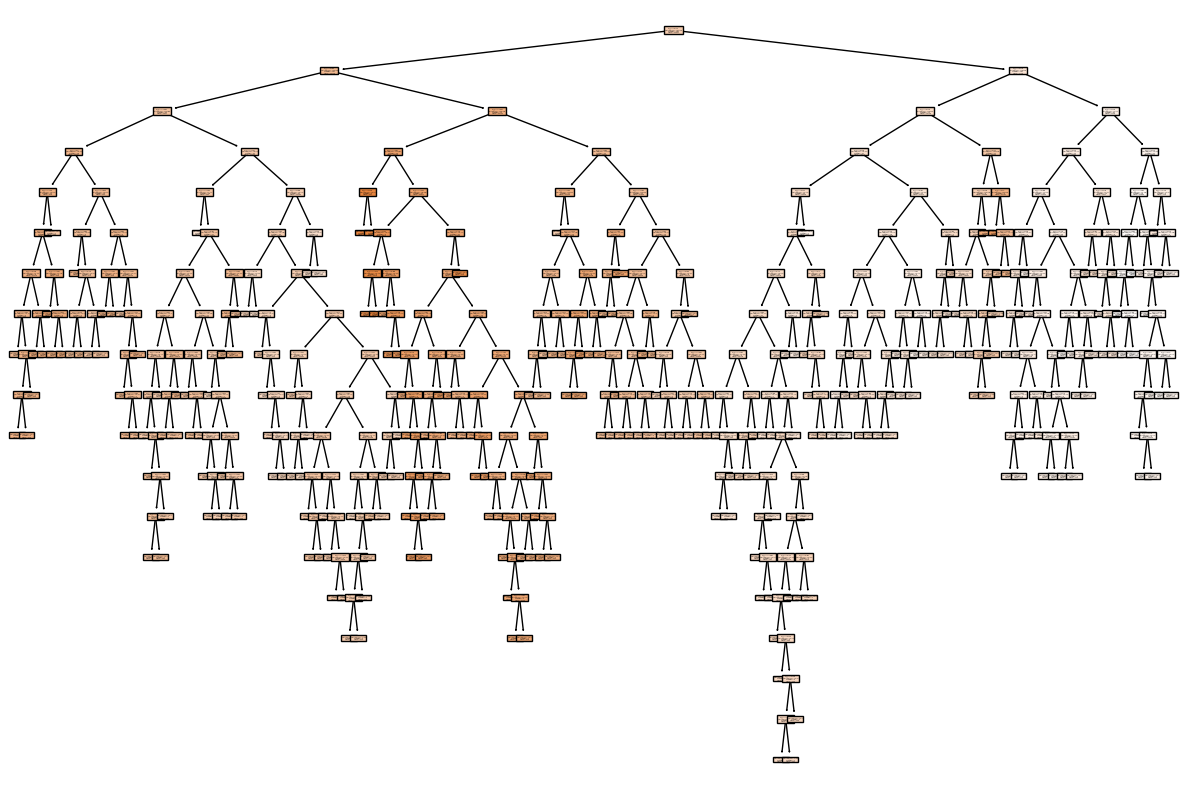

In [26]:
from sklearn import tree
plt.figure(figsize=(15,10))
print(tree.plot_tree(clf,filled=True))

# RANDOM FOREST REGRESSOR

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor(criterion= 'squared_error')
rf_regressor.fit(X_train_selected_RFE,y_train)
y_pred_RF=rf_regressor.predict(X_test_selected_RFE)
mae_RF=mean_absolute_error(y_test,y_pred_RF)
mse_RF=mean_squared_error(y_test,y_pred_RF)
rmse_RF=(mean_squared_error(y_test,y_pred_RF))**(1/2)
r2_score_RF=r2_score(y_test,y_pred_RF)

C:\Users\rajat\AppData\Local\Temp\ipykernel_26704\4032757180.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train_selected_RFE,y_train)


# BASIC NEURAL NETWORK

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu

In [38]:
input_shape = [X_train_selected_RFE.shape[1]]
model = Sequential(
    [               

        tf.keras.Input(shape=input_shape),    #specify input shape
        Dense(units=34, activation='linear',name='L1'),
        Dense(units=17,activation='relu',name='L2'),
        Dense(units=8,activation='relu',name='L3'),
        Dense(units=1,activation='linear',name='L4'),
    
    ], name = "my_model" 
)

In [39]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 34)                204       
                                                                 
 L2 (Dense)                  (None, 17)                595       
                                                                 
 L3 (Dense)                  (None, 8)                 144       
                                                                 
 L4 (Dense)                  (None, 1)                 9         
                                                                 
Total params: 952
Trainable params: 952
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer="Adam", loss="mae", metrics=["mae", "acc"])

In [41]:
model.fit(
    X_train_selected_RFE,y_train,
    epochs=100
)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 23.5116 - mae: 23.5116 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 23.1443 - mae: 23.1443 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 967us/step - loss: 22.7982 - mae: 22.7982 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 22.4045 - mae: 22.4045 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 902us/step - loss: 21.9457 - mae: 21.9457 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 21.3428 - mae: 21.3428 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 20.6072 - mae: 20.6072 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 19.7663 - mae: 19.7663 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 18.9272 - m

In [42]:
y_pred_DL=model.predict(X_test_selected_RFE)

4/4 [==============================] - 0s 2ms/step


In [43]:
mae_DL=mean_absolute_error(y_test,y_pred_DL)
mse_DL=mean_squared_error(y_test,y_pred_DL)
rmse_DL=(mean_squared_error(y_test,y_pred_DL))**(1/2)
r2_score_DL=r2_score(y_test,y_pred_DL)

# COMPARING RESULTS OF ALL MODELS

In [44]:
results_data={'MAE':[mae_LR,mae_DT,mae_RF,mae_DL],
              'MSE':[mse_LR,mse_DT,mse_RF,mse_DL],
              'RMSE':[rmse_LR,rmse_DT,rmse_RF,rmse_DL],
              'R2_SCORE':[r2_score_LR,r2_score_DT,r2_score_RF,r2_score_DL]}
results=pd.DataFrame(results_data, index=['LINEAR REGRESSION','DECISION TREE','RANDOM FOREST','NEURAL NETWORK'])

In [45]:
results

,MAE,MSE,RMSE,R2_SCORE
LINEAR REGRESSION,2.871618,14.149374,3.761565,0.765743
DECISION TREE,2.864000,16.012200,4.001525,0.734903
RANDOM FOREST,2.231970,10.060684,3.171858,0.833436
NEURAL NETWORK,2.199449,9.299958,3.049583,0.846030


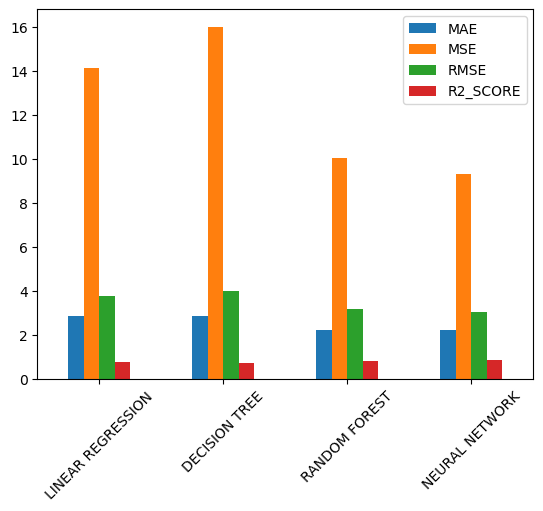

In [46]:
ax=results.plot.bar(rot=45)